In [12]:
import numpy as np
import pandas as pd
np.__version__
pd.__version__

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()   # 플롯 스타일 설정

In [5]:
data = pd.read_csv('./bigdata/test_data/PythonDataScienceHandbook-master/notebooks/data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [7]:
print("Mean height: ", heights.mean())
print("Standard deviation: ", heights.std())
print("Minimum height: ", heights.min())
print("Maximum height: ", heights.max())

Mean height:  179.73809523809524
Standard deviation:  6.931843442745892
Minimum height:  163
Maximum height:  193


> 매번 집계 연산이 전체 배열을 하나의 요약 값으로 축소해서 배열 값의 분포에 대한 정보를 제공한다는 점을 알아두자.

In [8]:
print('25th percentile: ', np.percentile(heights, 25))
print('Median: ', np.median(heights))
print('75th percentile: ', np.percentile(heights, 75))

25th percentile:  174.25
Median:  182.0
75th percentile:  183.0


Text(0, 0.5, 'number')

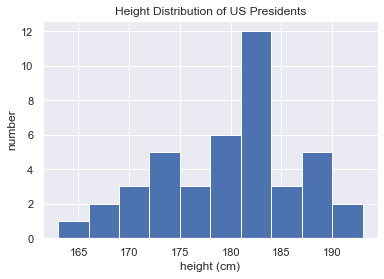

In [13]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')

## 배열 연산: 브로드캐스팅
 앞에서 느린 파이썬 루프를 제거하기 위해 연산을 벡터화하는 NumPy의 유니버설 함수 사용법을 알아봤다.
벡터화 연산의 또 다른 방법은 NumPy의 브로드캐스팅 기능을 사용하는 것이다.

### 브로드캐스팅 소개
 같은 크기의 배열에서 이항 연산은 배열의 요소 단위로 수행된다는 점을 기억하자.
NumPy 브로드 캐스팅의 이점은 값 복제가 실제로 발생하지 않는다는 것이다.

In [14]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

> 브로드캐스팅을 사용하면 이러한 유형의 이항 연산을 서로 다른 크기의 배열에서 수행할 수 있다.
> 예를 들어, 배열에 스칼라(0차원 배열이라고 생각하면 된다)를 쉽게 더할 수 있다.

In [15]:
a + 5

array([5, 6, 7])

In [16]:
# 다차원 배열도 가능
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [18]:
# 여기서 1차원 배열 a는 M의 형상에 맞추기 위해
# 두 번째 차원까지 확장 또는 브로드캐스팅된다.
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [19]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [20]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

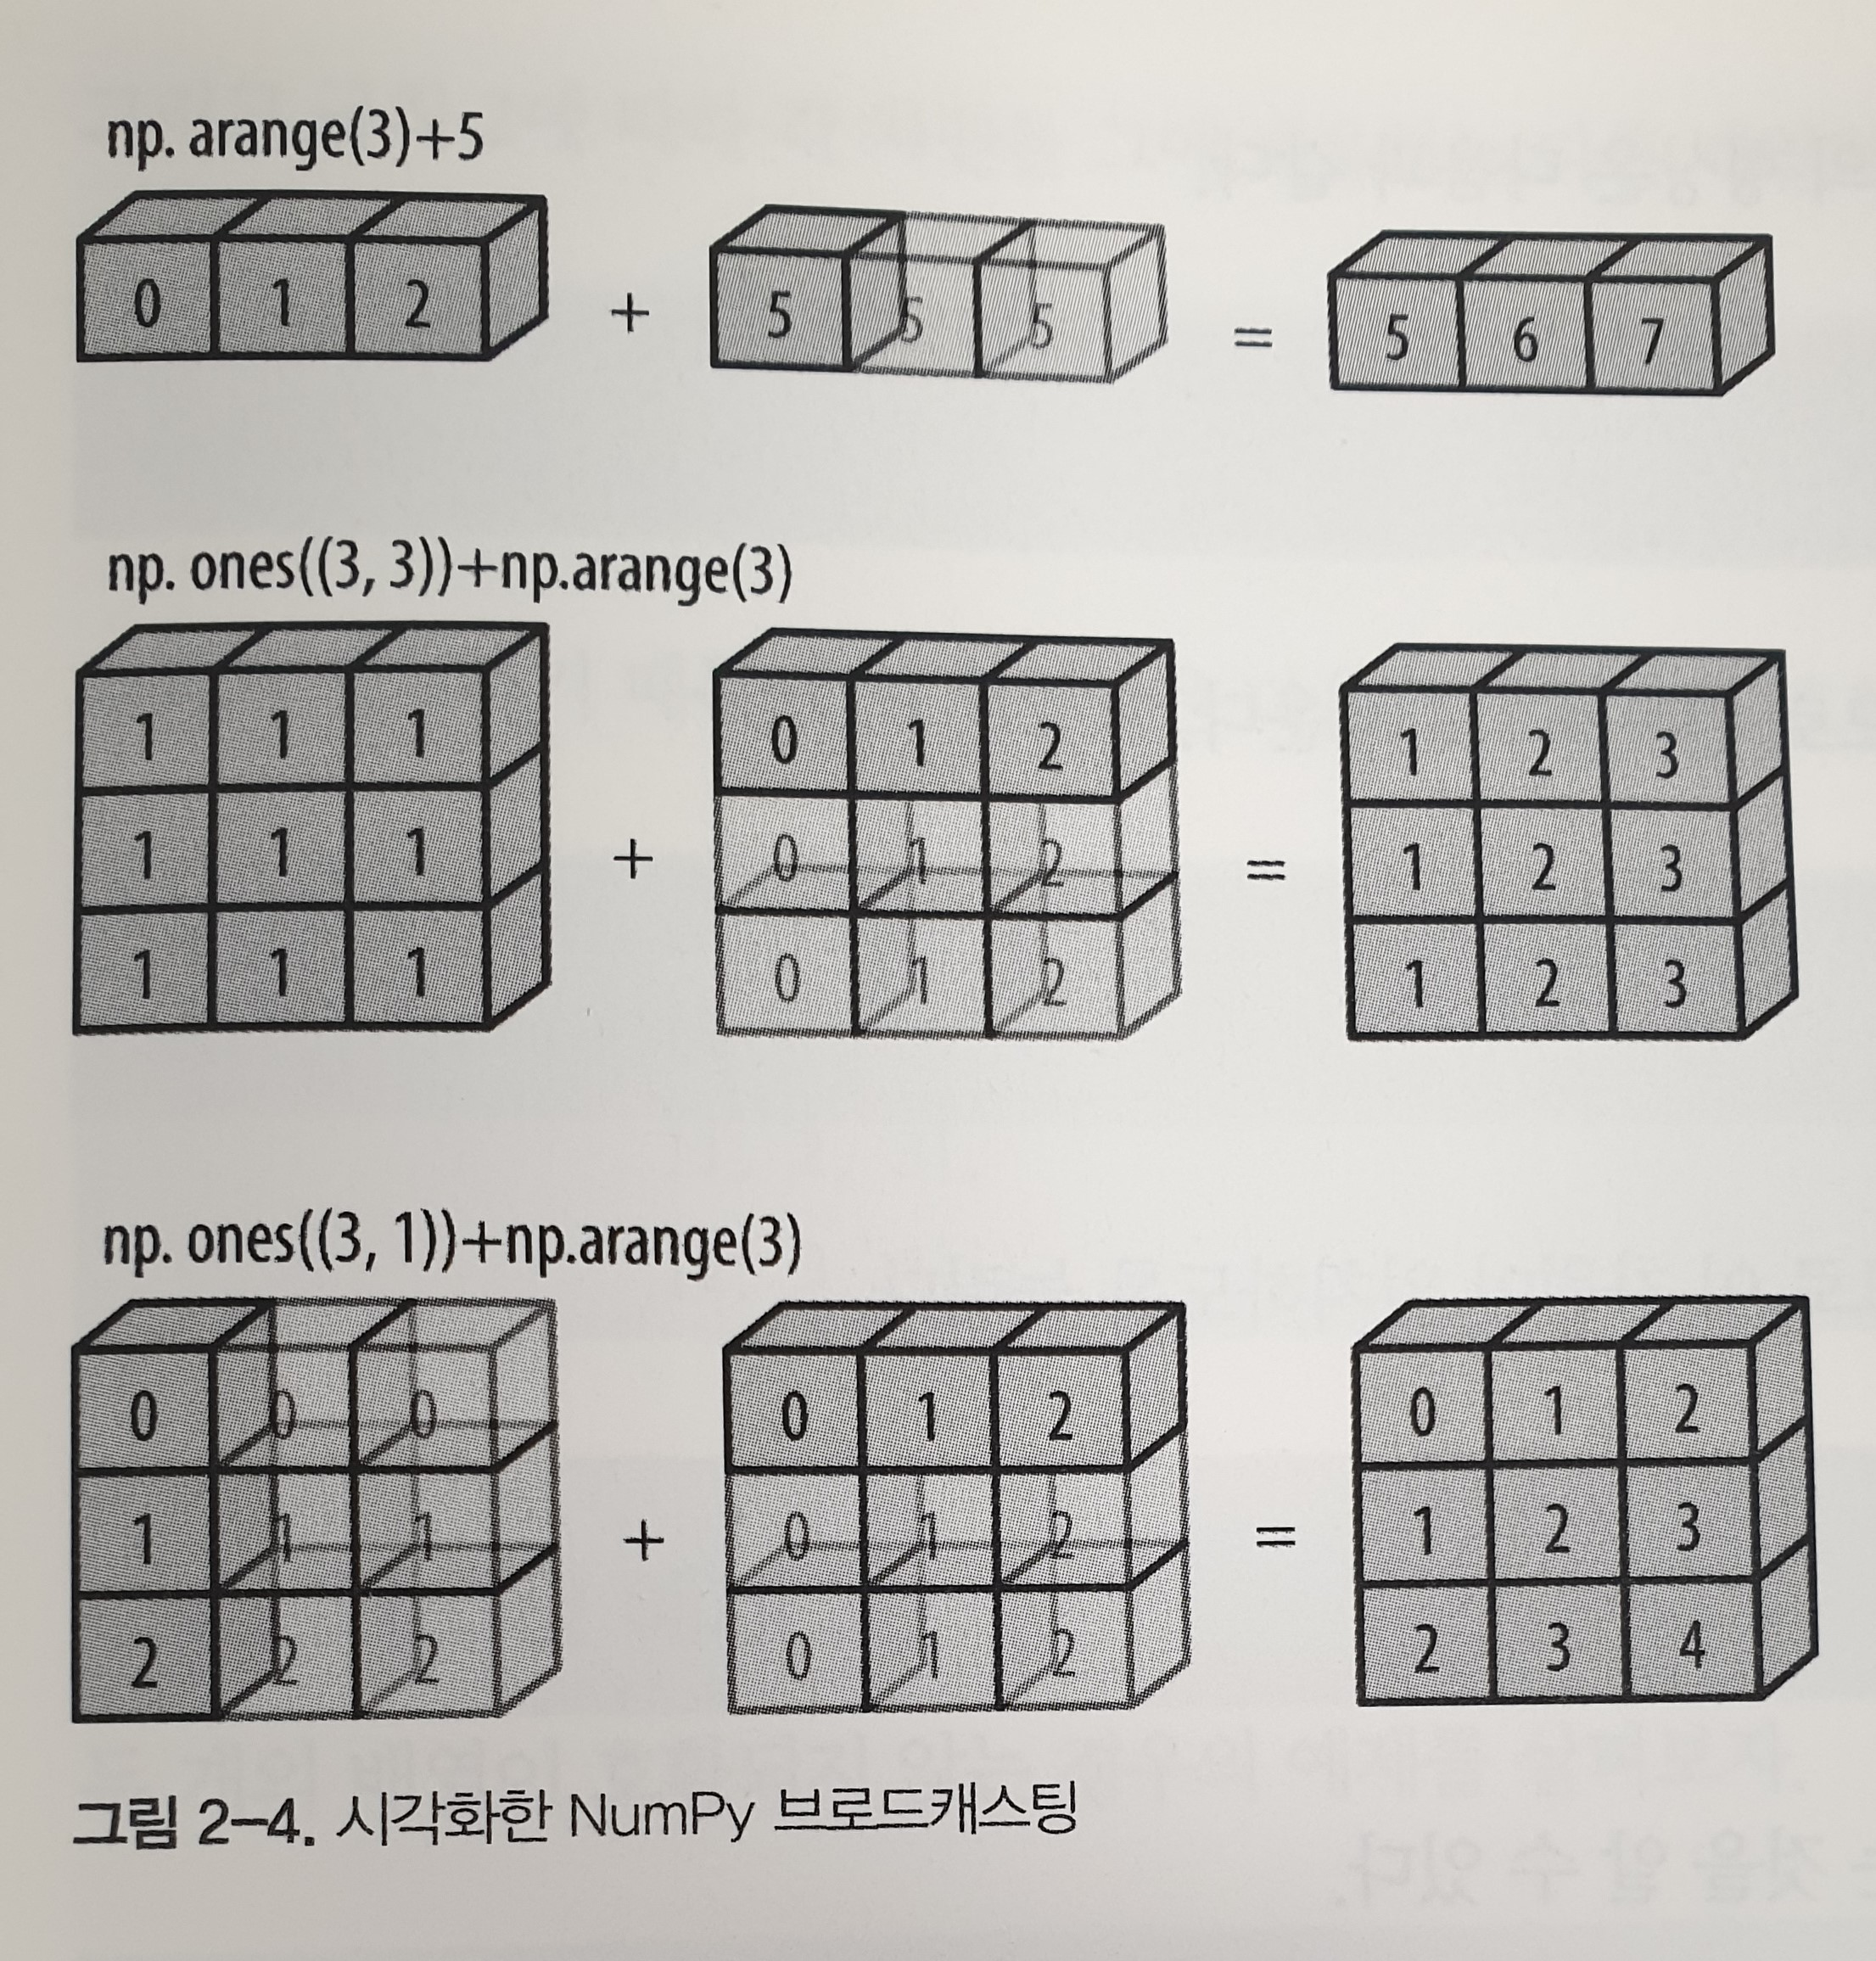

### 브로드캐스팅 규칙
 NumPy의 브로드캐스팅은 두 배열 사이의 상호작용을 결정하기 위해 엄격한 규칙을 따른다.

1. 두 배열의 차원수가 다르면 더 작은 수의 차원을 가진 배열 형상의 앞쪽(왼쪽)을 1로 채운다.
2. 두 배열의 형상이 어떤 차원에서도 일치하지 않는다면 해당 차원의 형상이 1인 배열이 다른 형상과 일치하도록 늘어난다.
3. 임의의 차원에서 크기가 일치하지 않고 1도 아니라면 오류가 발생한다.

### 브로드캐스팅 예제1
 1차원 배열에 2차원 배열을 더하기

In [21]:
M = np.ones((2, 3))
a = np.arange(3)

In [22]:
M.shape = (2, 3)
a.shape = (3, )

> 규칙 1에 따라 배열 a가 더 작은 차원을 가지므로 왼쪽을 1로 채운다.
> M.shape -> (2, 3)
> a.shape -> (1, 3)

> 규칙 2에 따라 첫 번째 차원이 일치하지 않으므로 차원이 일치하도록 늘린다.
> M.shape -> (2, 3)
> a.shape -> (2, 3)

In [25]:
# 모양이 일치하면 최종 형상이 (2, 3)이 된다는 것을 알 수 있다.
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### 브로드캐스팅 예제2
 두 배열 모두 필요한 경우

In [27]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

In [28]:
a.shape = (3, 1)
b.shape = (3, )

> 규칙 1에 따라 배열 b의 형상에 1을 덧붙여야 한다.
> M.shape -> (3, 1)
> a.shape -> (1, 3)

> 규칙 2에 따라 각 차원을 그에 대응하는 다른 배열의 크기에 일치하도록 늘린다.
> M.shape -> (3, 3)
> a.shape -> (3, 3)

In [30]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### 브로드캐스팅 예제3
 두 개의 배열이 서로 호환되지 않는 경우

In [31]:
M = np.ones((3, 2))
a = np.arange(3)

In [32]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

## 실전 브로드캐스팅

### 배열을 중앙 정렬하기

In [35]:
X = np.random.random((10, 3))
X

array([[0.70940056, 0.97274689, 0.02488055],
       [0.37996858, 0.9612655 , 0.91145221],
       [0.068105  , 0.15463187, 0.25661386],
       [0.7076348 , 0.7880774 , 0.63757096],
       [0.2563024 , 0.27148153, 0.93930545],
       [0.6497934 , 0.35683413, 0.49781657],
       [0.25997178, 0.13528535, 0.57734471],
       [0.50058464, 0.17605763, 0.77192313],
       [0.42806081, 0.5189775 , 0.62625529],
       [0.03941552, 0.28881303, 0.55615082]])

In [41]:
Xmean = X.mean(0)
Xmean

array([0.39992375, 0.46241708, 0.57993135])

In [42]:
X_centered = X - Xmean

In [43]:
X_centered.mean(0)

array([-5.55111512e-17,  3.33066907e-17, -9.99200722e-17])

### 2차원 함수 플로팅하기
 브로드캐스팅은 2차원 함수를 기반으로 이미지를 그릴 때도 매우 유용하다. 함수를 정의하고 싶다면 브로드캐스팅을 사용해 그리드에 이 함수를 계산할 수 있다.

In [44]:
# x와 y는 0에서 5까지 50단계로 나눈 배열임
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

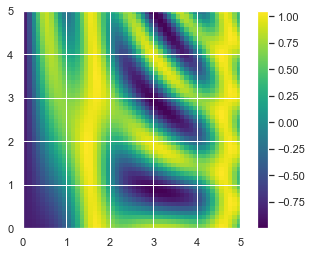

In [51]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar()

## 비교, 마스크, 부울 로직
 NumPy 배열 내의 값을 검사하고 조작하는 데 부울 마스크를 사용하는 법을 다룬다. 마스킹은 특정 기준에 따라 배열의 값을 추출하거나 수정, 계산, 조작할 때 사용한다. 특정 값보다 더 큰 값을 모두 세거나 특정 임계치를 넘어서는 이상치를 모두 제거하려는 경우가 여기에 해당한다.

### 예제: 비온 날 세기

In [47]:
# Pandas를 이용해 인치 단위의 강수량 데이터를 NumPy 배열로 추출
rainfall = pd.read_csv('./bigdata/test_data/PythonDataScienceHandbook-master/notebooks/data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254   # 1/10mm -> inches
inches.shape

(365,)

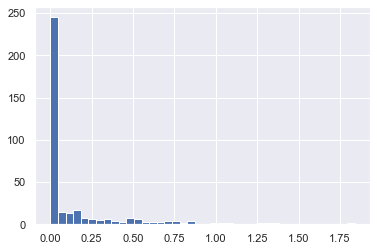

In [52]:
plt.hist(inches, 40);

### ufunc으로서의 비교 연산자
 NumPy는 요소 단위의 유니버설 함수로 <, > 같은 비교 연산자도 구현한다.
이 비교 연산자의 결과는 항상 부울 타입의 배열이다. 표준 비교 연산자 여섯 개 모두 사용할 수 있다. (모든 크기와 형상의 배열에 적용 가능)

In [55]:
x = np.array([1, 2, 3, 4, 5])
x < 3

array([ True,  True, False, False, False])

In [56]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

### 팬시 인덱싱 알아보기

In [58]:
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]
